<a href="https://colab.research.google.com/github/SalmaKaiss-ui/Data-Science/blob/main/Salma_Kaiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importation des premières librairies utiles à notre analyse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Nettoyage et description des données sources
Données mensuelles de consommation totale d'électricité en énergie
Ces données sont disponibles sur la page https://www.rte-france.com/eco2mix/telecharger-les-indicateurs. Nous aurons besoin, dans ce jeu de données, de la consommation totale en energie.

In [15]:
df_conso = pd.read_csv("https://raw.githubusercontent.com/SalmaKaiss-ui/Data-Science/main/Analyse%20Timeseries%20Old%20School/ts_conso_energie_RTE.csv",
                       encoding="latin_1", header=0, sep=";", parse_dates=[0], index_col="Mois")
df_conso.head()

,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Mois,,,,,,,,,,,,,,,,,,,,,
2012-01-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02-01,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03-01,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04-01,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05-01,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,974,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


Ce fichier .csv est donc importé dans un DataFrame Pandas avec l'attribut parse_date sur la colonne 0 afin d'indiquer que notre jeu de données est bien une Timeserie. Les dates sont ainsi passées en index.

Pour ce notebook, nous n'aurons besoin que de la consommation en énergie en TWh :

In [ ]:
df_conso.columns

Index(['Qualité', 'Territoire', 'Production totale', 'Production nucléaire',
       'Production thermique totale', 'Production thermique charbon',
       'Production thermique fioul', 'Production thermique gaz',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies', 'Consommation totale', 'Solde exportateur',
       'Echanges export', 'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique'],
      dtype='object')

In [16]:
df_conso = df_conso[["Territoire","Qualité","Consommation totale"]]
df_conso.head()

,Territoire,Qualité,Consommation totale
Mois,,,
2012-01-01,France,Données définitives,51086
2012-02-01,France,Données définitives,54476
2012-03-01,France,Données définitives,43156
2012-04-01,France,Données définitives,40176
2012-05-01,France,Données définitives,35257


In [28]:
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1221 entries, 2012-01-01 to 2020-09-01
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Territoire           1221 non-null   object
 1   Qualité              1221 non-null   object
 2   Consommation totale  1221 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 38.2+ KB


In [29]:
df_conso.describe(include = "all")

,Territoire,Qualité,Consommation totale
count,1221,1221,1221.000000
unique,13,2,NaN
top,France,Données définitives,NaN
freq,105,948,NaN
mean,NaN,NaN,6006.176085
std,NaN,NaN,10678.691936
min,NaN,NaN,0.000000
25%,NaN,NaN,1789.000000
50%,NaN,NaN,2938.000000
75%,NaN,NaN,4508.000000


Ce jeu de données ne semble pas contenir de null, cependant des agglomérats semblent être présents (France).
Les moyennes, médiane et écart-type semblent être cohérents.

In [ ]:
df_conso["Territoire"].unique()

array(['France', 'Grand-Est', 'Nouvelle-Aquitaine',
       'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Ile-de-France', 'Occitanie', 'Normandie',
       'Hauts-de-France', 'PACA', 'Pays-de-la-Loire'], dtype=object)

Nous remarquons dans cette liste des régions représentées que la Corse est absente. L'aglomérat France est bien présent, nous allons donc constituer 2 DataFrames pour séparer les données nationales et régionales.

In [21]:
df_conso_france = df_conso[df_conso["Territoire"]=="France"]
df_conso_regions = df_conso[df_conso["Territoire"]!="France"]
 # Données France
df_conso_france.head()

,Territoire,Qualité,Consommation totale
Mois,,,
2012-01-01,France,Données définitives,51086
2012-02-01,France,Données définitives,54476
2012-03-01,France,Données définitives,43156
2012-04-01,France,Données définitives,40176
2012-05-01,France,Données définitives,35257


In [22]:
 # Données Régions
df_conso_regions.head()

,Territoire,Qualité,Consommation totale
Mois,,,
2013-01-01,Grand-Est,Données définitives,0
2013-01-01,Nouvelle-Aquitaine,Données définitives,0
2013-01-01,Auvergne-Rhône-Alpes,Données définitives,0
2013-01-01,Bourgogne-Franche-Comté,Données définitives,0
2013-01-01,Bretagne,Données définitives,0


In [23]:
#Verification des consommations à 0
df_conso_regions[df_conso_regions["Consommation totale"]==0].groupby(by="Mois").nunique()

,Territoire,Qualité,Consommation totale
Mois,,,
2013-01-01,12,1,1
2013-02-01,12,1,1
2013-03-01,12,1,1
2013-04-01,12,1,1
2013-05-01,12,1,1
2013-06-01,12,1,1
2013-07-01,12,1,1
2013-08-01,12,1,1
2013-09-01,12,1,1


Les données pour 2012 et 2013 au niveau régionnal sont donc absentes. Nous allons travailler avec les données à partir de 2014.

In [24]:
df_conso_regions = df_conso_regions[df_conso_regions.index.map(pd.to_datetime)>pd.to_datetime('2013-12-01')]
df_conso_regions.head()

,Territoire,Qualité,Consommation totale
Mois,,,
2014-01-01,Grand-Est,Données définitives,4594
2014-01-01,Nouvelle-Aquitaine,Données définitives,4501
2014-01-01,Auvergne-Rhône-Alpes,Données définitives,6693
2014-01-01,Bourgogne-Franche-Comté,Données définitives,2158
2014-01-01,Bretagne,Données définitives,2390


Afin d'avoir une visualisation globale de ces données régionales, nous allons projeter un lineplot Seaborn pour observer l'évolution des consommations régionales :

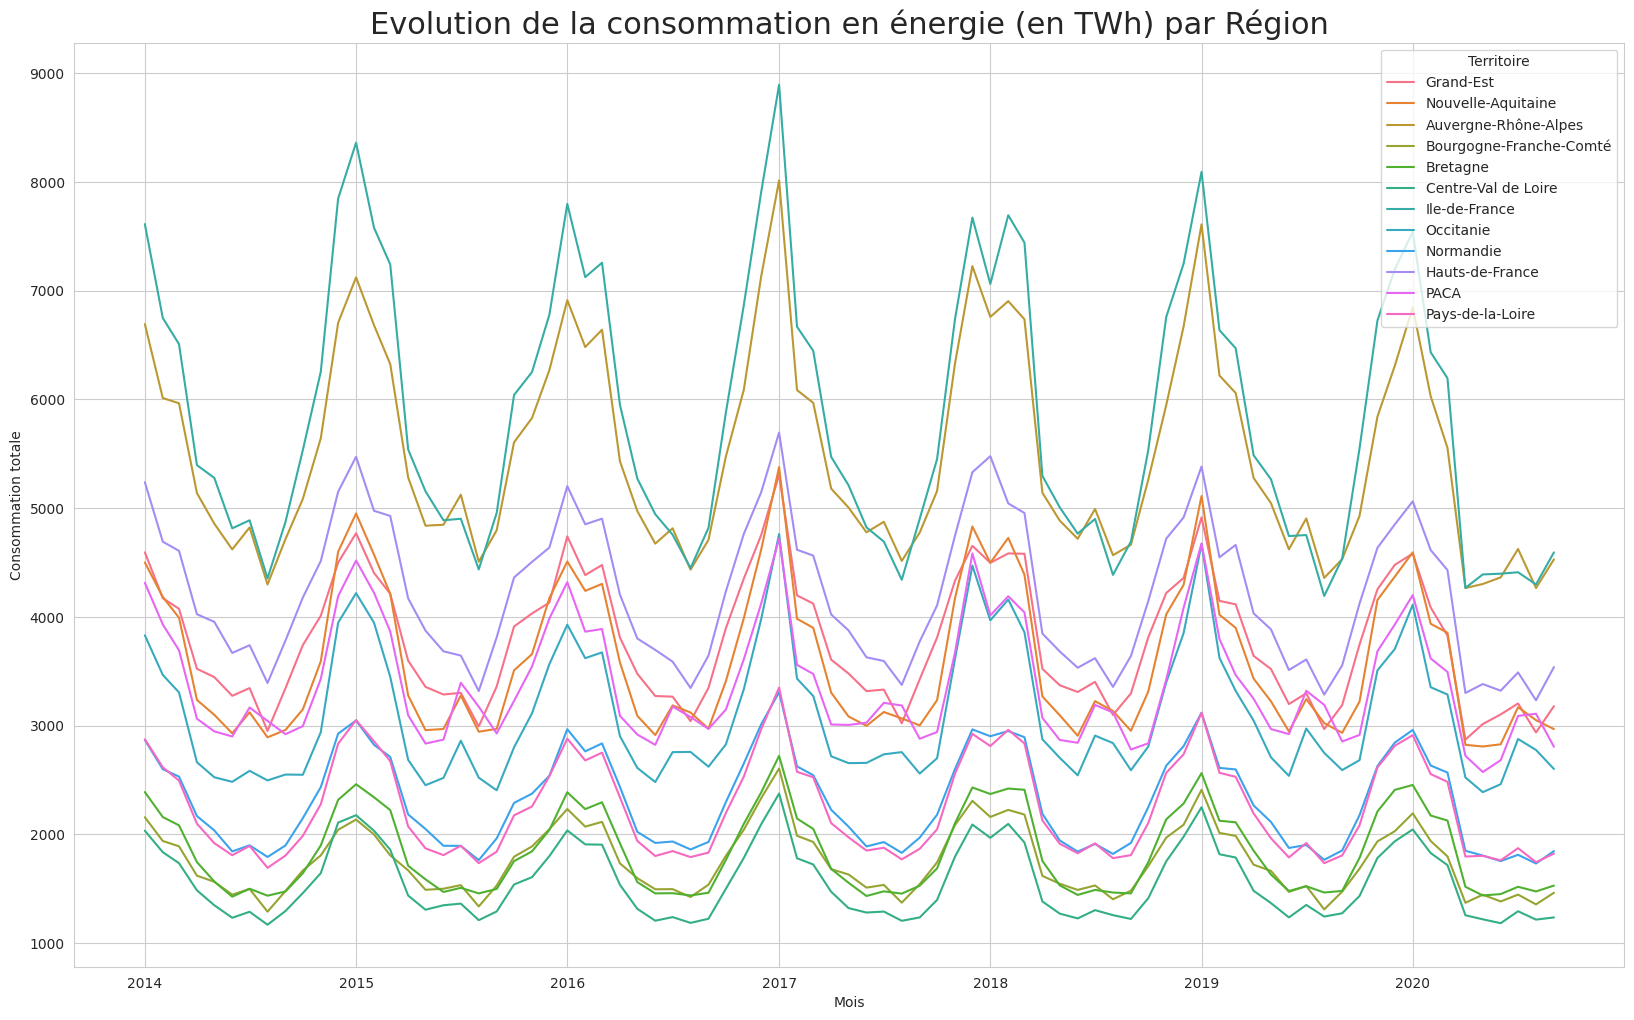

In [25]:
fig = plt.figure(figsize=(20,12))
sns.lineplot(data=df_conso_regions, x=df_conso_regions.index,  y="Consommation totale", hue="Territoire")
plt.title("Evolution de la consommation en énergie (en TWh) par Région", fontsize=22)
plt.show()

Comme nous pouvions nous y attendre, nous visualisons l'effet saisonnier sur la consommation totale. Les courbes des différentes régions de France suivent cependant la meme tendance qui semble être plûtot linéaire.

Nous allons également ploter les données "France" :

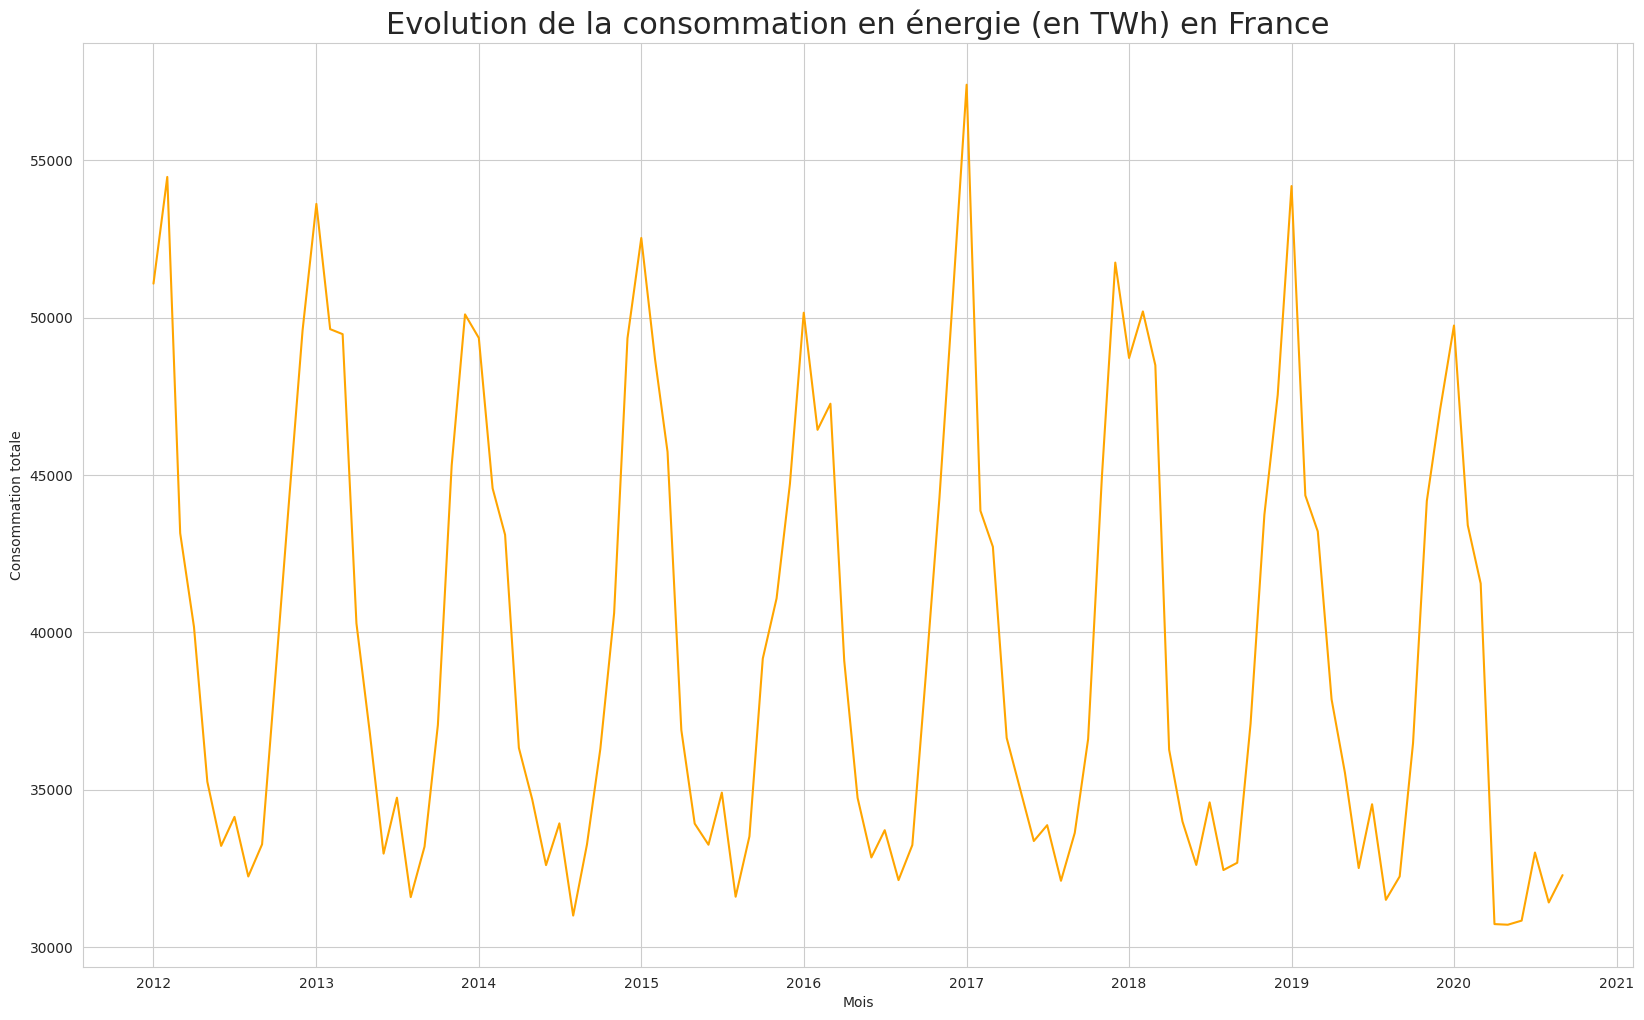

In [26]:
fig = plt.figure(figsize=(20,12))
sns.lineplot(data=df_conso_france, x=df_conso_france.index,  y="Consommation totale", color="orange")
plt.title("Evolution de la consommation en énergie (en TWh) en France", fontsize=22)
plt.show()

# Task
Fit a Seasonal AutoRegressive Integrated Moving Average (SARIMA) model to the 'Consommation totale' series from `df_conso_france`, using a non-seasonal order of (1,1,1) and a seasonal order of (1,1,1,12). Store the model results in a variable named `results1`, then generate diagnostic plots for the fitted model with a `figsize` of (20,14) and `lags` set to 50.

## Prepare Data for SARIMA

### Subtask:
Extract the 'Consommation totale' series from `df_conso_france` to be used for the SARIMA model. It's important to use the national data since it was previously plotted for a single time series.


**Reasoning**:
To prepare the data for the SARIMA model, I will extract the 'Consommation totale' column from the `df_conso_france` DataFrame, as specified in the instructions, and store it in a new variable named `y_conso_france`.



In [30]:
y_conso_france = df_conso_france['Consommation totale']
y_conso_france.head()

,Consommation totale
Mois,
2012-01-01,51086
2012-02-01,54476
2012-03-01,43156
2012-04-01,40176
2012-05-01,35257


**Reasoning**:
Now that the `y_conso_france` series is prepared, I will define and fit the SARIMA model using `statsmodels.tsa.statespace.sarimax.SARIMAX` with the specified non-seasonal order (1,1,1) and seasonal order (1,1,1,12), storing the results in `results1`.



In [31]:
model = sm.tsa.statespace.SARIMAX(y_conso_france, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results1 = model.fit()
print(results1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Consommation totale   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -709.106
Date:                            Fri, 28 Nov 2025   AIC                           1428.211
Time:                                    17:39:22   BIC                           1439.995
Sample:                                01-01-2012   HQIC                          1432.929
                                     - 09-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1393      0.134      1.040      0.298      -0.123       0.402
ma.L1         -0.7101      0.093   

**Reasoning**:
With the SARIMA model (`results1`) now fitted, the next logical step is to generate diagnostic plots as specified in the main task, using the `plot_diagnostics` function with the provided `figsize` and `lags` parameters.



matplotlib.figure.Figure

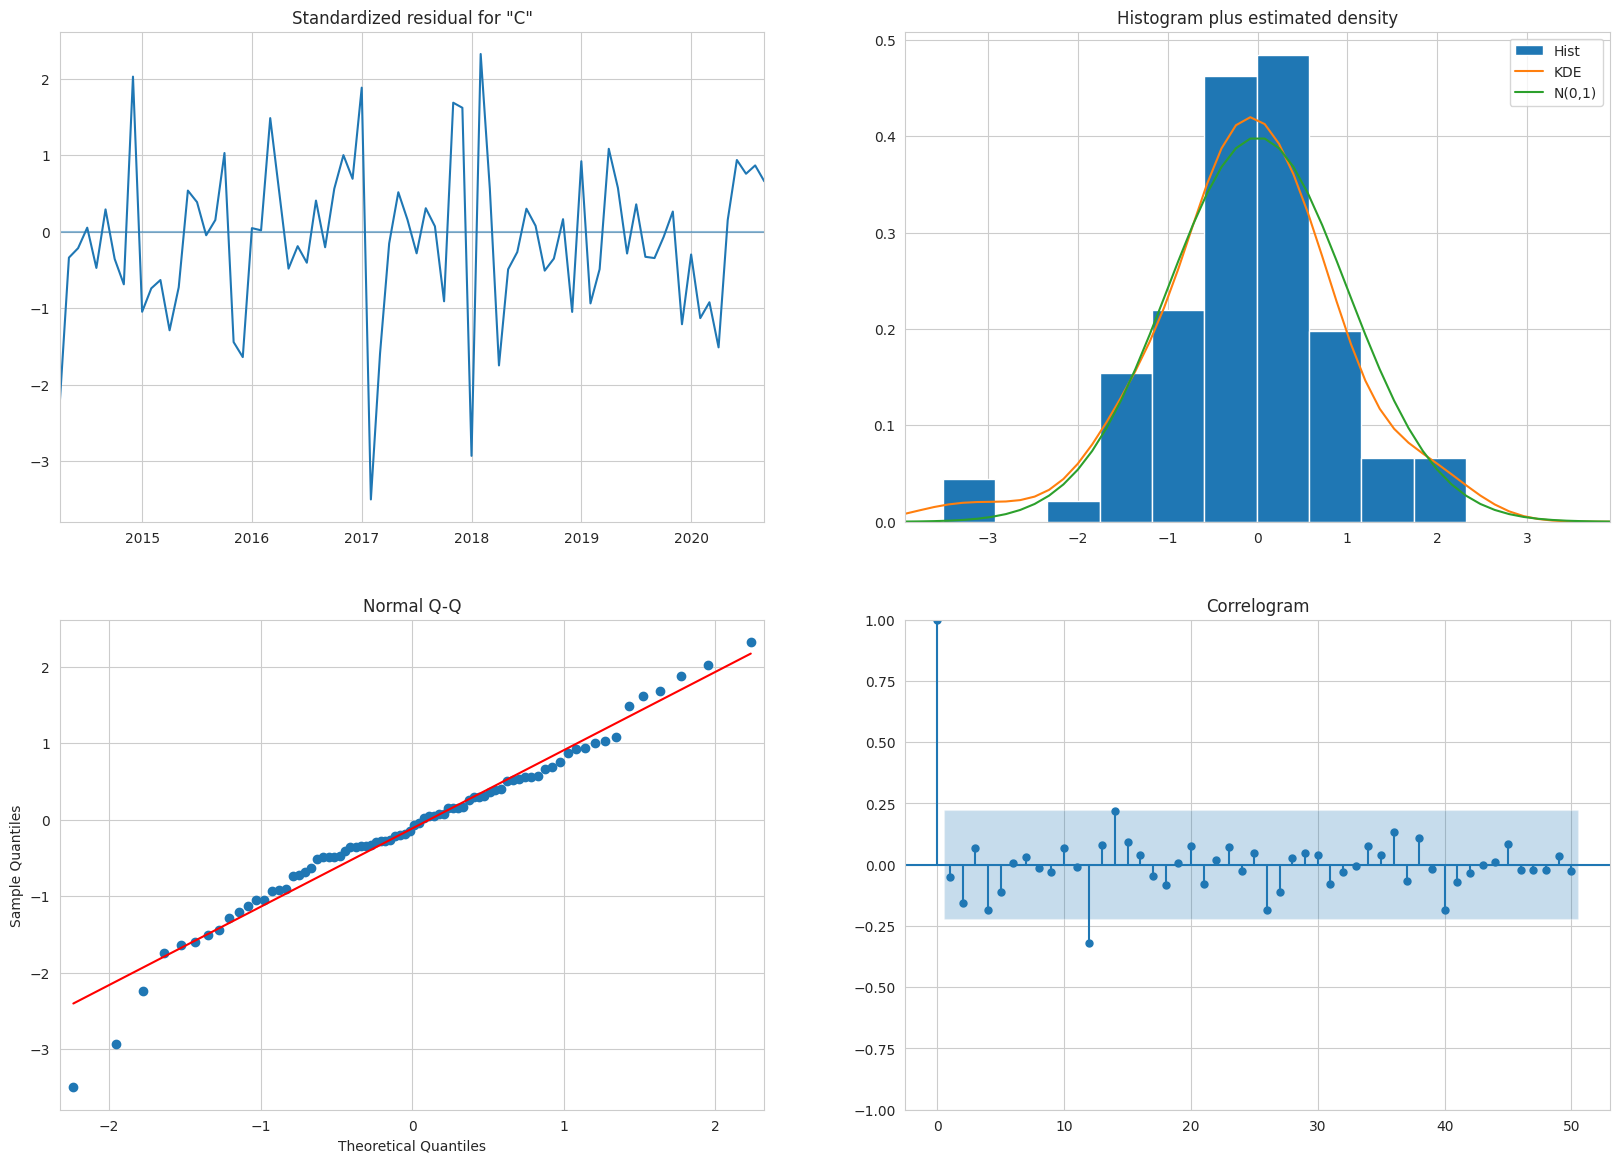

In [33]:
plot_diagnostics(sarima_res = results1, figsize=(20,14), lags=50)

## Final Task

### Subtask:
Summarize the results of the SARIMA model fitting and diagnostics, including any insights gained from the plots.


## Summary:

### Data Analysis Key Findings
*   The 'Consommation totale' series was successfully extracted from `df_conso_france`, with the first recorded value for 2012-01-01 being 51086.
*   A Seasonal AutoRegressive Integrated Moving Average (SARIMA) model was successfully fitted to the 'Consommation totale' series, utilizing a non-seasonal order of (1,1,1) and a seasonal order of (1,1,1,12).
*   The fitted SARIMA model yielded a Log Likelihood of -709.106 and an Akaike Information Criterion (AIC) of 1428.211.
*   Diagnostic plots for the fitted model were successfully generated with a `figsize` of (20,14) and `lags` set to 50, providing visual tools to assess model adequacy.

### Insights or Next Steps
*   The reported Log Likelihood and AIC values provide quantitative metrics for the model's fit, which are essential for comparing this model against other potential SARIMA configurations or alternative time series models.
*   The next crucial step is to analyze the generated diagnostic plots (e.g., residuals plot, QQ plot, correlogram) to ensure the model's assumptions are met, specifically that the residuals are white noise (uncorrelated, zero mean, constant variance) and normally distributed. This validation is critical before using the model for forecasting.
